Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "Maya Schuchert"

---

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 3:  Interpolation and applications

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** [ 8 pts] Analytically find coefficients of the interpolating  polynomial $P_2(x)$ that passes through these three points in the following bases
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Lagrange: $P(x) = \sum^2_{k=0} y_k \ell_k(x)$


and show that, independent of basis it's always the same polynomial.



1. Monomoial: 
$$ p_0 + p_1 (0) + p_2 (0)  = y_0(0)$$

$$ p_0 + p_1 (1) + p_2 (1^2)  = y_1(2)$$

$$ p_0 + p_1 (2) + p_2 (2^2)  = y_2(2)$$

\begin{bmatrix}
1 & 0 & 0 & :0\\
1 & 1 & 1 & :2\\
1 & 2 & 4 & :2\\
\end{bmatrix}
Though Guassian Method of elimination we get
\begin{bmatrix}
1 & 0 & 0 & :0\\
0 & 1 & 0 & :3\\
0 & 0 & 1 & :-1\\
\end{bmatrix}
Therefore our equation is $$P(x)=0+3t-1t^2$$

2. Lagrange:

For lagrange polynomials we know: 

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} $$

So for our three points, we would have:
    

**(b)** [4 pts] Any $N+1$ distinct values of $x$ uniquely define the $N+1$ Lagrange polynomials $\ell_0(x), \ell_1(x)\ldots\ell_N(x)$

show that these functions satisfy 

$$\sum^N_{i=0} \ell_i(x) = 1$$

for all values of $x$ (not just the nodes).  We say that the Lagrange polynomials form a "Partition of Unity" because they always sum to 1.

Hint:  consider interpolation of a constant function, $f(x) = c$ sampled at $N+1$ distinct points.


YOUR ANSWER HERE

## Question 2: Fun with Chebyshev Polynomials

**(a)** [4 pts] The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$\omega(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} \omega(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} 
a & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).  Note that you may have multiple non-zero coefficients $a$.  Make sure to cover all these cases and list the conditions that you will find these values.

\begin{equation}
cos(\theta)= x \\ 
\theta = cos^{-1}x \\
Tn(x)=Tn(cos(\theta))\quad and\quad Tm(x)=Tm(cos(\theta)) \\
=>\quad Tn(x)=Tn(cos(ncos^{-1}x))\quad and\quad Tm(x)=Tm(cos(mcos^{-1}x)) \\
\frac{d\theta}{dx}=cos^{-1}x\quad =>\quad d\theta = \frac{-1}{\sqrt{1-x^2}}dx \\
-\int_\pi^0 cos(n\theta)cos(m\theta)\;\mathrm{d}\theta \\
\int_0^\pi cos(n\theta)cos(m\theta)\;\mathrm{d}\theta = \frac{1}{2}\int_0^\pi cos(m+n)\theta+cos(m-n)\theta\;\mathrm{d}\theta \\
\frac{1}{2}[\frac{sin(m+n)\theta}{m+n}+\frac{sin(m-n)\theta}{m-n}]\Big|_0^\pi = 0\quad as\quad sin(\pi)=0\quad and\quad sin(0)=0 \\
Accordingly, \\
\frac{1}{2}[\frac{sin(2n)\theta}{2n}+\theta]\Big|_0^\pi = \frac{\pi}{2}\quad (finite\quad constant)\\
\end{equation}

**(b)** [4 pts] Consider the  shifted Gaussian 
$$ f(x) = e^{-(x - 3)^2} $$ on the interval $x\in[0,6]$

make a plot comparing the polynomial interpolant through $N=11$ points using 
* Evenly spaced points
* The appropriate Chebyshev nodes (i.e. roots of $T_{11}$: **note** you will need to transform the nodes defined on the interval $s\in[-1,1]$ to $x\in[0, 6]$)

Be sure to show both the interpolation points and a reasonably resolved interpolating polynomial $P_{10}(x)$, and label all lines and axes.

You can use any of the routines from the notes or `numpy.polyfit` and `numpy.polyval` to actually compute and plot the interpolating polynomial.

For fun, experiment with other functions (e.g. Runge's function $f(x) = 1/(1 + 25x^2)$)

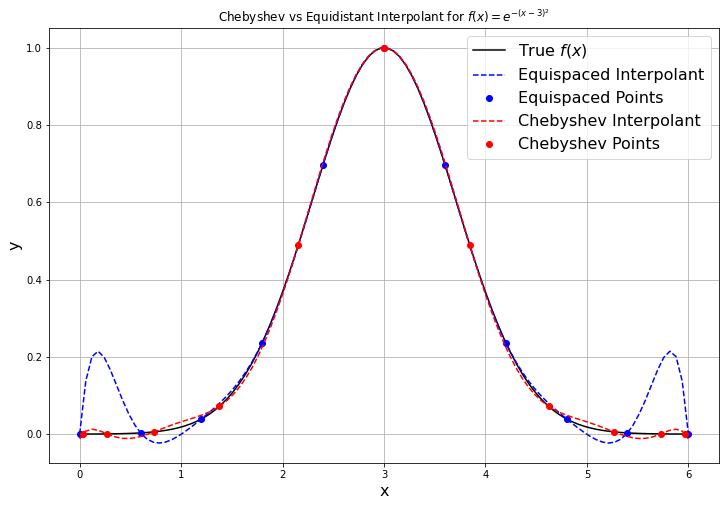

In [3]:
def lagrange_basis(x, data):
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]): 
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis
    
def poly_interpolant(x, data):
    P = numpy.zeros(x.shape[0])
    basis = lagrange_basis(x, data)
    for n in range(data.shape[0]):
        P += basis[n, :] * data[n, 1]
    return P

def f(x):
    return numpy.exp(-(x-3)**2)

x = numpy.linspace(0, 6, 100)
num_points = 11

equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(0, 6, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

P_lagrange = poly_interpolant(x, equidistant_data)

chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = 3 + 3*numpy.cos((2.0 * numpy.arange(1, num_points + 1) - 1.0) * numpy.pi / (2.0 * num_points))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

P_cheby1 = poly_interpolant(x, chebyshev_data)

coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)
P_cheby2 = numpy.polynomial.chebyshev.chebval(x, coeff)

fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(x, P_lagrange, 'b--', label="Equispaced Interpolant")
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'bo', label="Equispaced Points")
axes.set_xlabel("x",fontsize=16)
axes.set_ylabel("y",fontsize=16)
axes.grid()
axes.set_title("Chebyshev vs Equidistant Interpolant for $f(x)=e^{-(x-3)^2}$")
axes.plot(x, P_cheby1, 'r--', label="Chebyshev Interpolant")
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'ro', label="Chebyshev Points")
axes.legend(loc='upper right', fontsize=16)

plt.show()

**(c)** [4 pts] define the relative error as
        
$$
 r = \frac{||f(x) - P_N(x)||}{||f(x)||}
$$

where $||\cdot||$ is an appropriate norm (length) of a vector, in python you can calculate this by

```python
x = numpy.linspace(x_min, x_max)
P_N = numpy.polyval(p, x)

err = f(x) - P_N(x)
r = numpy.linalg.norm(err)/numpy.linalg.norm(f(x))
```

* Make a well labeled plot showing log(r) vs number of grid points $N$ for $N\in[5,30]$ 
* Comment briefly on your results. Some questions to consider are:
    *  does $P_N(x)\rightarrow f(x)$ as $N\rightarrow\infty$?
    *  Is one interpolant more accurate than the other?
    * Anything else you notice

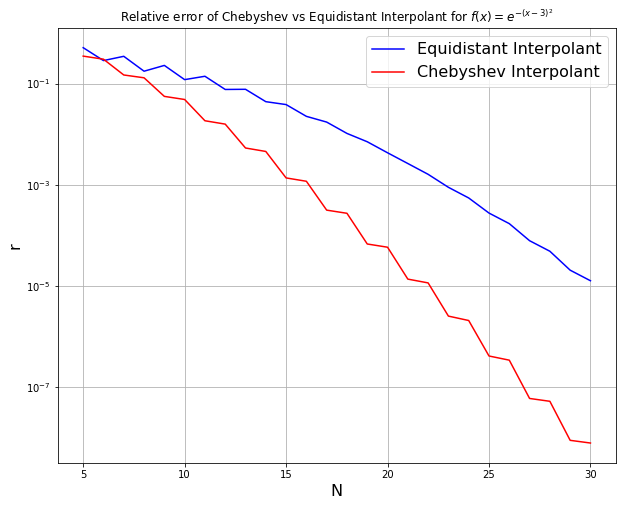

In [4]:
N = numpy.linspace(5, 30, 26)
Edata = numpy.empty((26, 2))
Edata[:,0] = N
Cdata = numpy.empty((26, 2))
Cdata[:,0] = N
i = 0
for n in N:
    n = int(n)
    x = numpy.linspace(0, 6)
    
    equidistant_data = numpy.empty((n, 2))
    equidistant_data[:, 0] = numpy.linspace(0, 6, n)
    equidistant_data[:, 1] = f(equidistant_data[:, 0])
    P_lagrange = poly_interpolant(x, equidistant_data)
    
    P_N1 = numpy.polyval(P_lagrange, x)
    err1 = f(x) - P_N1
    r1 = numpy.linalg.norm(P_lagrange - f(x))/numpy.linalg.norm(f(x))
    Edata[i,1] = r1
    
    chebyshev_data = numpy.empty((n, 2))
    chebyshev_data[:, 0] = 3 + 3*numpy.cos((2.0 * numpy.arange(1, n + 1) - 1.0) * numpy.pi / (2.0 * n))
    chebyshev_data[:, 1] = f(chebyshev_data[:, 0]) 
    P_cheby1 = poly_interpolant(x, chebyshev_data)
        
    P_N2 = numpy.polyval(P_cheby1, x)
    err2 = f(x) - P_N2
    r2 = numpy.linalg.norm(P_cheby1 - f(x))/numpy.linalg.norm(f(x))
    Cdata[i, 1] = r2
                           
    i += 1
                           
fig = plt.figure(figsize=(10,8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(Edata[:,0], Edata[:,1], 'b', label="Equidistant Interpolant")
axes.plot(Cdata[:,0], Cdata[:,1], 'r', label="Chebyshev Interpolant")
axes.set_xlabel("N",fontsize=16)
axes.set_ylabel("r",fontsize=16)
axes.grid()
axes.set_yscale("log")
axes.set_title("Relative error of Chebyshev vs Equidistant Interpolant for $f(x)=e^{-(x-3)^2}$")
axes.legend(loc='upper right',fontsize=16)
                           
plt.show()

- No
- Equidistant
- No

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.   

Here we will construct a matrix   $D$  such that multiplying a vector of $\mathbf{y}$ values would lead to a second order approximation of the First derivative for the given data. 

In other words, defining the two vectors   $\mathbf{x}=[x_0, x_1,\ldots,x_N]^T$ and $\mathbf{y}=[y_0, y_1,\ldots,y_N]^T$  such that

$$\mathbf{y} = f(\mathbf{x})$$

for some scalar function $f$,  find a matrix $D$ such that 

$$
f'(\mathbf{x}) \approx D\mathbf{y}
$$

**(a)** [16] Using any method of your choice, derive the following finite-difference formulas for 3 equispaced points $x_i, x_{i+1}, x_{i+2}$ 

* 2nd-order accurate approximation to the *1st derivative* at  point 
    * $x_i$ (forward differences)
    * $x_{i+1}$ (centered differences)
    * $x_{i+2}$ (backward differences)
* 2nd-order accurate approximation to the *2nd derivative* evaluated at each point (hint: think before you grind)

Some hints:
1. consider the interpolating polynomial $P_2(x)$ through those 3 points and calculate $P'_2(x)$ at each point.
2. the method of undetermined coefficients on Taylor's series can be useful here as well



1- Forward difference
\begin{equation}
f^\prime=\frac{1}{2\Delta}[4f(x+\Delta)-f(x+2\Delta)-3f(x)+4(\Delta x)^3 \frac{f^{\prime \prime \prime}(\varepsilon_{1})-2f^{\prime \prime \prime}(\varepsilon_{2})}{3!}]\\
=\frac{4f(x+\Delta)-f(x+2\Delta)-3f(x)}{2\Delta x}+(\Delta x)^2\frac{f^{\prime \prime \prime}(\varepsilon_{1})-2f^{\prime \prime \prime}(\varepsilon_{2})}{3} \\
\end{equation}
$\quad\quad\quad\quad\quad\quad\quad\quad\therefore\quad$  $\frac{-3f(x_{1})+4f(x_{i+1})-f(x_{i+2})}{2\Delta x}$ is an approximation of $f^{\prime}$ with a error that is proportional to $\Delta x^2.$ $\\$
2- Center difference
\begin{equation}
P^{\prime}_{2}(0)=\frac{-f_{0}+f_{2}}{2h} \\
\end{equation}
3- Backwards difference
\begin{equation}
f^\prime=\frac{-1}{2\Delta}[4f(x-\Delta)-f(x-2\Delta)-3f(x)-4(\Delta x)^3 \frac{f^{\prime \prime \prime}(\varepsilon_{1})-2f^{\prime \prime \prime}(\varepsilon_{2})}{3!}]\\
=\frac{-4f(x-\Delta)+f(x-2\Delta)+3f(x)}{2\Delta x}+(\Delta x)^2\frac{f^{\prime \prime \prime}(\varepsilon_{1})-2f^{\prime \prime \prime}(\varepsilon_{2})}{3} \\
\end{equation}
$\quad\quad\quad\quad\quad\quad\quad\quad\therefore\quad$  $\frac{f(x_{1})-4f(x_{i+1})+3f(x_{i+2})}{2\Delta x}$ is an approximation of $f^{\prime}$ with a error that is proportional to $\Delta x^2.$

**(b)** [4] Now consider an equispaced set of points  $y_i = f(x_i)$.  Can you describe the structure of a consistent 2nd order, first derivative matrix $D$,  such that 

$$
    f'(\mathbf{x}) \approx D\mathbf{y}
$$

returns the consistent 1st derivative at every point (including the end points)

YOUR ANSWER HERE

**(c)** [4] Using the function `fdcoeffV.py` described in class (and included with this homework), write a python function that takes in a numpy array of coordinates $x$ (not necessarily evenly spaced)  and returns a matrix $D$ that calculates the consistent 2nd-order 1st derivatives at each point using 3 nearest neighbors (be careful at the edges)

Given this matrix $D$, it is easy to test it for various functions and meshes

In [5]:
from  fdcoeffV import fdcoeffV

def D1(x):
    """
    Write a good doc-string
    
    x: ndarray of coordinates
    D: ndarray
        Matrix (2-D ndarray ) to calculate consistent 2nd order first derivative
    """
    from  scipy.special import factorial
    
    k = 2

    n = x.shape[0]
    assert  k < n, " The order of the derivative must be less than the stencil width"

    # Generate the Vandermonde matrix from the Taylor series
    A = numpy.ones((n,n))
    # xrow = (x - xbar)  # displacements x-xbar 
    for i in range(1,n):
        A[i,:] = (x**(i))/factorial(i);
        
    b = numpy.zeros(n)    # b is right hand side,
    b[k] = 1              # so k'th derivative term remains

    c = numpy.linalg.solve(A,b)          # solve n by n system for coefficients
    
    return c
    


In [6]:
# Let's test this using f(x) = sin(pi*x) on a uniform mesh
N = 200
x = numpy.linspace(-1, 1, N)
dx = x[1]-x[0]

pi = numpy.pi
y = lambda x: numpy.sin(pi*x)
y_prime = lambda x: pi*numpy.cos(pi*x)

print("Uniform mesh: ",end='')
numpy.testing.assert_allclose(numpy.dot(D1(x), y(x)), y_prime(x), rtol=1e-2)
print("Success!")

# test on a randomized mesh
x_rand = x + dx/3.*numpy.random.rand(N)
print("Random mesh: ",end ='')
numpy.testing.assert_allclose(numpy.dot(D1(x_rand), y(x_rand)), y_prime(x_rand), rtol=1e-2)
print("Success!")



Uniform mesh: 

LinAlgError: Singular matrix

**(d)** [6] make a beautiful convergence plot showing how the relative error in your finite element approximation

$$ r = \frac{||f'(\mathbf{x}) - D\mathbf{y}||}{||f'(\mathbf{x})||}$$

 scales with mesh spacing $\Delta x$ for $f(x) = \sin(\pi x)$ on the interval $x\in[-1,1]$.  What is the expected rate of convergence?  Compare with the best fit straight line (in log space) to your error estimates.

<function matplotlib.pyplot.show(close=None, block=None)>

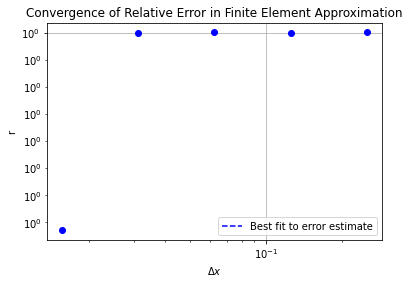

In [7]:
f = lambda x : numpy.sin(numpy.pi*x)
f_prime = lambda x: numpy.pi * numpy.cos(numpy.pi*x)
N = 2**numpy.array(range(3, 10)) + 1
dx = numpy.zeros(N.shape)
err = numpy.zeros(N.shape)

for i,n in enumerate(N):
    x = numpy.linspace(-1, 1, n)
    dx[i] = x[1] - x[0]
    Dy = D1(x).dot(f(x))
    err[i] = numpy.linalg.norm(f_prime(x) - Dy) / numpy.linalg.norm(f_prime(x))

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.loglog(dx, err, 'bo')
xlog = numpy.logspace(numpy.log10(dx[0]), numpy.log10(dx[-1]), 100)
poly = numpy.polyfit(numpy.log10(dx), numpy.log10(err), 1)
err_poly = 10**numpy.polyval(poly, numpy.log10(xlog))
axes.loglog(xlog, err_poly, 'b--', label="Best fit to error estimate")
axes.set_title("Convergence of Relative Error in Finite Element Approximation")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("r")
axes.legend()
axes.grid()
plt.show

YOUR ANSWER HERE

**(e)** [4] Suppose we knew the *first derivative* of a function $f(x)$ at a discrete set of points and wanted to solve for the discrete function itself.  i.e.  ideally given $D$ and vector $\mathbf{y} = f'(\mathbf{x})$,  we would like to be able to solve the linear algebra problem

$$
    D\mathbf{f} = \mathbf{y}
$$

for $\mathbf{f}\approx f(\bf{x})$.  Discuss any issues we might have with this approach.

Well, to start the solution might not exist. Additionally, D might not be invertible and even if so, D^-1f'(x) might not be defined at the set of discrete points. Lastly, the set points from f'(x) might be discontinuity points of f'(x).